In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

In [3]:
with open("/content/points-arret-reseau-transports-commun-lyonnais.json", "r") as f:
    data = json.load(f)
df_raw = pd.DataFrame(data['values'])


print(f"File Loaded : {len(df_raw)} raw, {len(df_raw.columns)} col")
print(f"Memory size : {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

File Loaded : 9840 raw, 16 col
Memory size : 5.79 MB


In [4]:
def initial_data_inspection(df):
    """
    Raw Data inspection
    """
    print("Data Head:")
    display(df.head())

    print('\n'+'='*40)
    print("Data types:")
    display(df.dtypes)

    print('\n'+'='*40)
    print("Data infos:")
    display(df.info(memory_usage='deep'))

    print('\n'+'='*40)
    print("\nNumerical data description:")
    display(df.describe())

    print('\n'+'='*40)
    print("Textual data description:")
    text_cols = df.select_dtypes(include=['object']).columns
    for col in text_cols:
        print(f"\n -> {col}:")
        print(f"  - unique values : {df[col].nunique()}")
        print(f"  - Top 5 uv :\n{df[col].value_counts().head()}")

initial_data_inspection(df_raw)

Data Head:


,adresse,ascenseur,commune,desserte,escalator,gid,id,insee,last_update,last_update_fme,lat,localise_face_a_adresse,lon,nom,pmr,zone
0,9 AVENUE DU 24 AOUT 1944,False,Corbas,"87:A,ZI1:A",False,24616,1,69273,2025-10-28 05:04:22.421774,2025-10-28 05:04:22.421774,45.682869,None,4.909324,24 Août,True,1
1,257 AVENUE JEAN JAURES,False,Lyon 7e Arrondissement,BRMB:A,False,29718,40842,69387,2025-10-28 05:04:22.628263,2025-10-28 05:04:22.628263,45.731968,None,4.834041,Debourg,True,1
2,61 RUE AMPERE,False,Oullins-Pierre-Bénite,C7:R,False,24617,1000,69149,2025-10-28 05:04:22.421897,2025-10-28 05:04:22.421897,45.705215,None,4.816354,Garanjou,True,1
3,100 AVENUE JULES GUESDE,False,Vénissieux,"39:A,JD133:R",False,24618,10006,69259,2025-10-28 05:04:22.421971,2025-10-28 05:04:22.421971,45.709248,None,4.887284,Curie - Jules Guesde,True,1
4,109 AVENUE JULES GUESDE,False,Vénissieux,"39:R,JD133:A",False,24619,10007,69259,2025-10-28 05:04:22.422045,2025-10-28 05:04:22.422045,45.709249,None,4.887366,Curie - Jules Guesde,True,1



Data types:


,0
adresse,object
ascenseur,object
commune,object
desserte,object
escalator,object
gid,int64
id,int64
insee,object
last_update,object
last_update_fme,object



Data infos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   adresse                  5000 non-null   object 
 1   ascenseur                5000 non-null   object 
 2   commune                  4997 non-null   object 
 3   desserte                 9840 non-null   object 
 4   escalator                5000 non-null   object 
 5   gid                      9840 non-null   int64  
 6   id                       9840 non-null   int64  
 7   insee                    4997 non-null   object 
 8   last_update              9840 non-null   object 
 9   last_update_fme          9840 non-null   object 
 10  lat                      9840 non-null   float64
 11  localise_face_a_adresse  321 non-null    object 
 12  lon                      9840 non-null   float64
 13  nom                      9840 non-null   object 
 14  pmr        

None



Numerical data description:


,gid,id,lat,lon
count,9840.000000,9840.000000,9840.000000,9840.000000
mean,25416.013618,25584.824390,45.803527,4.740661
std,3760.849660,14728.247637,0.145619,0.168726
min,12766.000000,1.000000,45.520562,4.062065
25%,21929.750000,15274.750000,45.711391,4.641100
50%,26042.500000,25630.500000,45.767872,4.775909
75%,28518.250000,37008.000000,45.861028,4.860590
max,31042.000000,60003.000000,46.312200,5.304568



Textual data description:

 -> adresse:
  - unique values : 3886
  - Top 5 uv :
adresse
12 RUE DU 24 MARS 1852         16
0 PLACE CARNOT                 12
419 COURS EMILE ZOLA           12
165 CHEMIN DU GRAND REVOYET    11
0 AVENUE DU RHONE              11
Name: count, dtype: int64

 -> ascenseur:
  - unique values : 2
  - Top 5 uv :
ascenseur
False    4955
True       45
Name: count, dtype: int64

 -> commune:
  - unique values : 92
  - Top 5 uv :
commune
Villeurbanne              247
Saint-Priest              214
Vénissieux                197
Lyon 9e Arrondissement    194
Lyon 3e Arrondissement    167
Name: count, dtype: int64

 -> desserte:
  - unique values : 4527
  - Top 5 uv :
desserte
93:R     26
93:A     24
T2:A     22
T2:R     22
C25:A    22
Name: count, dtype: int64

 -> escalator:
  - unique values : 2
  - Top 5 uv :
escalator
False    4955
True       45
Name: count, dtype: int64

 -> insee:
  - unique values : 92
  - Top 5 uv :
insee
69266    247
69290    214
69259    197


Columns with missing values :
                 column  missing  pourcentage
localise_face_a_adresse     9519    96.737805
                commune     4843    49.217480
                  insee     4843    49.217480
              ascenseur     4840    49.186992
              escalator     4840    49.186992
                adresse     4840    49.186992
                    pmr     2459    24.989837



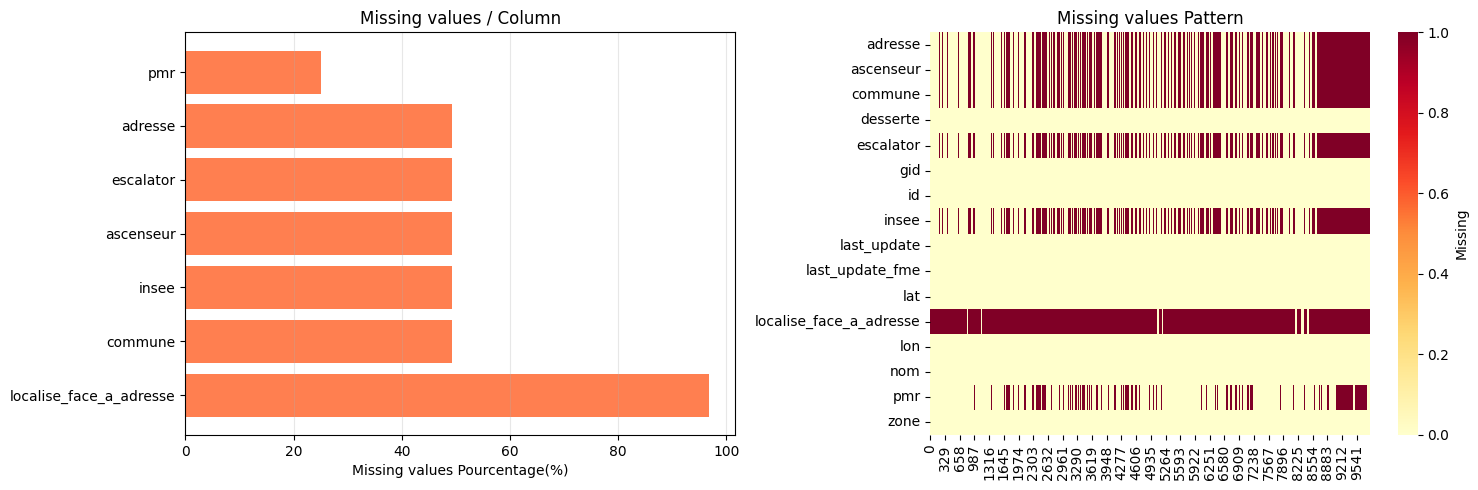

In [5]:
def analyze_missing_values(df, save_path=None):
    """
    Missing values analysis (data quality)
    """

    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100

    missing_df = pd.DataFrame({
        'column': missing.index,
        'missing': missing.values,
        'pourcentage': missing_pct.values
    }).sort_values('missing', ascending=False)

    missing_df = missing_df[missing_df['missing'] > 0]

    if len(missing_df) > 0:
        print("Columns with missing values :")
        print(missing_df.to_string(index=False))
        print()
        # Visualisation
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        # Bar plot
        axes[0].barh(missing_df['column'], missing_df['pourcentage'], color='coral')
        axes[0].set_xlabel('Missing values Pourcentage(%)')
        axes[0].set_title('Missing values / Column')
        axes[0].grid(axis='x', alpha=0.3)

        # Heatmap
        sns.heatmap(
            df.isnull().T,
            cmap='YlOrRd',
            cbar_kws={'label': 'Missing'},
            ax=axes[1],
            yticklabels=True
        )
        axes[1].set_title('Missing values Pattern')

        plt.tight_layout()
        if save_path:
            plt.savefig(save_path, dpi=150, bbox_inches='tight')
        plt.show()
    else:
        print("No Missing values detected!")

    return missing_df

missing_analysis = analyze_missing_values(df_raw)

In [6]:
def analyze_duplicates(df):
    """
    Duplicates analysis
    """

    n_duplicates_full = df.duplicated().sum()
    print(f"Full Duplicates : {n_duplicates_full} ({n_duplicates_full/len(df)*100:.2f}%)\n")

    if n_duplicates_full > 0:
        print("\nExamples :")
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head(10))

    key_columns = ['gid', 'adresse', 'commune']

    print('\n'+'='*40)
    for col in key_columns:
        n_dup = df.duplicated(subset=[col]).sum()
        print(f"-> Duplicates on '{col}' : {n_dup}")

        if n_dup > 0 :
            dup_values = df[df.duplicated(subset=[col], keep=False)][col].value_counts()
            display(dup_values.head(10))

    geo_dup = df.duplicated(subset=['lat', 'lon']).sum()
    print('\n'+'='*40)
    print(f"\nGeographique duplicates (same lat/lon) : {geo_dup}")

    if geo_dup > 0:
        print("Same Stops :")
        geo_dup_df = df[df.duplicated(subset=['lat', 'lon'], keep=False)][['adresse', 'lat', 'lon']].head(10)
        display(geo_dup_df)

analyze_duplicates(df_raw)

Full Duplicates : 0 (0.00%)


-> Duplicates on 'gid' : 0
-> Duplicates on 'adresse' : 5953


,count
adresse,
12 RUE DU 24 MARS 1852,16
0 PLACE CARNOT,12
419 COURS EMILE ZOLA,12
0 AVENUE DU RHONE,11
165 CHEMIN DU GRAND REVOYET,11
1 RUE PROFESSEUR GUERIN,9
0 CHEMIN DU CHARBONNIER,8
0 ROUTE NATIONALE 6,8
0 AVENUE DOYEN JEAN LEPINE,7


-> Duplicates on 'commune' : 9747


,count
commune,
Villeurbanne,247
Saint-Priest,214
Vénissieux,197
Lyon 9e Arrondissement,194
Lyon 3e Arrondissement,167
Lyon 8e Arrondissement,157
Lyon 7e Arrondissement,155
Vaulx-en-Velin,154
Bron,153




Geographique duplicates (same lat/lon) : 475
Same Stops :


,adresse,lat,lon
577,0 CHEMIN DE RENONCEAU,45.630707,4.995941
578,0 CHEMIN DE RENONCEAU,45.630707,4.995941
678,None,45.679187,4.717016
725,None,45.678427,4.704875
1034,None,45.826900,4.622700
1035,None,46.154500,4.595400
1036,None,46.168500,4.603100
1037,None,46.168500,4.603100
1038,None,46.106400,4.738200
1040,None,46.106400,4.738200



GPS cordinates analyzes :
Latitude - Min: 45.520562, Max: 46.312200
Longitude - Min: 4.062065, Max: 5.304568
Outliers latitude : 3652
Outliers longitude : 5019

Stops out bbox Lyon (5724) :


,adresse,commune,lat,lon
33,0 ROUTE DE SAINT TRIVIER,Cailloux-sur-Fontaines,45.853372,4.878126
34,0 ROUTE DE SAINT TRIVIER,Cailloux-sur-Fontaines,45.853338,4.878006
57,445 ROUTE DU CAILLOU,Cailloux-sur-Fontaines,45.850177,4.876973
58,383 ROUTE DU CAILLOU,Cailloux-sur-Fontaines,45.850173,4.876779
70,41 RUE DES GOBINS,Charly,45.649396,4.793269
84,31 ROUTE DE LYON,Neuville-sur-Saône,45.868599,4.839665
97,546 RUE DE L ETRA,Charly,45.644218,4.793385
137,21 AVENUE DE LA RESISTANCE,Saint-Germain-au-Mont-d'Or,45.879671,4.804545
170,2 AVENUE DU 2EME SPAHIS,Saint-Germain-au-Mont-d'Or,45.889002,4.806173
171,1 AVENUE JACQUES BREL,Saint-Germain-au-Mont-d'Or,45.888602,4.806323


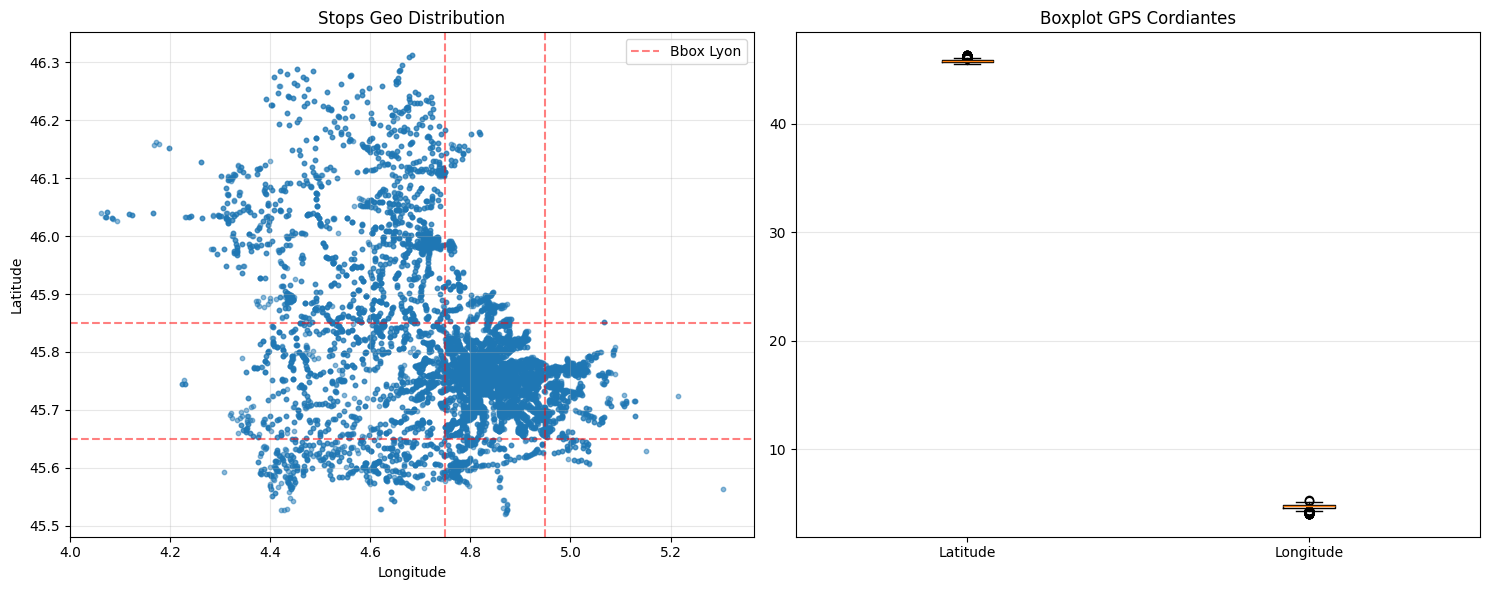

Numerical values analysis (1) :

   id:
Q1=15274.75, Q3=37008.0, IQR=21733.25
Outliers: 0 (0.00%)


In [7]:
def analyze_outliers(df, save_path=None):
    """
    Outliers detection
    """

    if 'lat' in df.columns and 'lon' in df.columns:
        print("\nGPS cordinates analyzes :")

        # Bounding box Lyon
        LYON_BBOX = {
            'lat_min': 45.65, 'lat_max': 45.85,
            'lon_min': 4.75, 'lon_max': 4.95
        }

        lat_outliers = df[
            (df['lat'] < LYON_BBOX['lat_min']) |
            (df['lat'] > LYON_BBOX['lat_max'])
        ]
        lon_outliers = df[
            (df['lon'] < LYON_BBOX['lon_min']) |
            (df['lon'] > LYON_BBOX['lon_max'])
        ]

        print(f"Latitude - Min: {df['lat'].min():.6f}, Max: {df['lat'].max():.6f}")
        print(f"Longitude - Min: {df['lon'].min():.6f}, Max: {df['lon'].max():.6f}")
        print(f"Outliers latitude : {len(lat_outliers)}")
        print(f"Outliers longitude : {len(lon_outliers)}")

        if len(lat_outliers) > 0 or len(lon_outliers) > 0:
            outliers = pd.concat([lat_outliers, lon_outliers]).drop_duplicates()
            print(f"\nStops out bbox Lyon ({len(outliers)}) :")
            display(outliers[['adresse', 'commune', 'lat', 'lon']].head(10))

        # Visualisation
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # Scatter plot
        axes[0].scatter(df['lon'], df['lat'], alpha=0.5, s=10)
        axes[0].axhline(LYON_BBOX['lat_min'], color='r', linestyle='--', alpha=0.5, label='Bbox Lyon')
        axes[0].axhline(LYON_BBOX['lat_max'], color='r', linestyle='--', alpha=0.5)
        axes[0].axvline(LYON_BBOX['lon_min'], color='r', linestyle='--', alpha=0.5)
        axes[0].axvline(LYON_BBOX['lon_max'], color='r', linestyle='--', alpha=0.5)
        axes[0].set_xlabel('Longitude')
        axes[0].set_ylabel('Latitude')
        axes[0].set_title('Stops Geo Distribution')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)

        # Boxplots
        axes[1].boxplot([df['lat'], df['lon']], labels=['Latitude', 'Longitude'])
        axes[1].set_title('Boxplot GPS Cordiantes')
        axes[1].grid(axis='y', alpha=0.3)

        plt.tight_layout()
        if save_path:
            plt.savefig(save_path, dpi=150, bbox_inches='tight')
        plt.show()

    # Numeric cols
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col not in ['lat', 'lon', 'gid', 'id_insee']]

    if len(numeric_cols) > 0:
        print(f"Numerical values analysis ({len(numeric_cols)}) :")

        for col in numeric_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

            print(f"\n   {col}:")
            print(f"Q1={Q1}, Q3={Q3}, IQR={IQR}")
            print(f"Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

analyze_outliers(df_raw)


ADRESSE :
                      Value  Count  Pourcentage
     12 RUE DU 24 MARS 1852     16         0.32
             0 PLACE CARNOT     12         0.24
       419 COURS EMILE ZOLA     12         0.24
165 CHEMIN DU GRAND REVOYET     11         0.22
          0 AVENUE DU RHONE     11         0.22
    1 RUE PROFESSEUR GUERIN      9         0.18
        0 ROUTE NATIONALE 6      8         0.16
    0 CHEMIN DU CHARBONNIER      8         0.16
 0 AVENUE DOYEN JEAN LEPINE      7         0.14
        0 ROUTE DE LIMONEST      7         0.14
      0 BOULEVARD DU RAQUIN      7         0.14
           31 ROUTE DE LYON      6         0.12
            0 ROUTE DE LYON      6         0.12
        0 AVENUE DES CANUTS      6         0.12
     368 AVENUE JEAN JAURES      5         0.10

ASCENSEUR :
Value  Count  Pourcentage
False   4955         99.1
 True     45          0.9


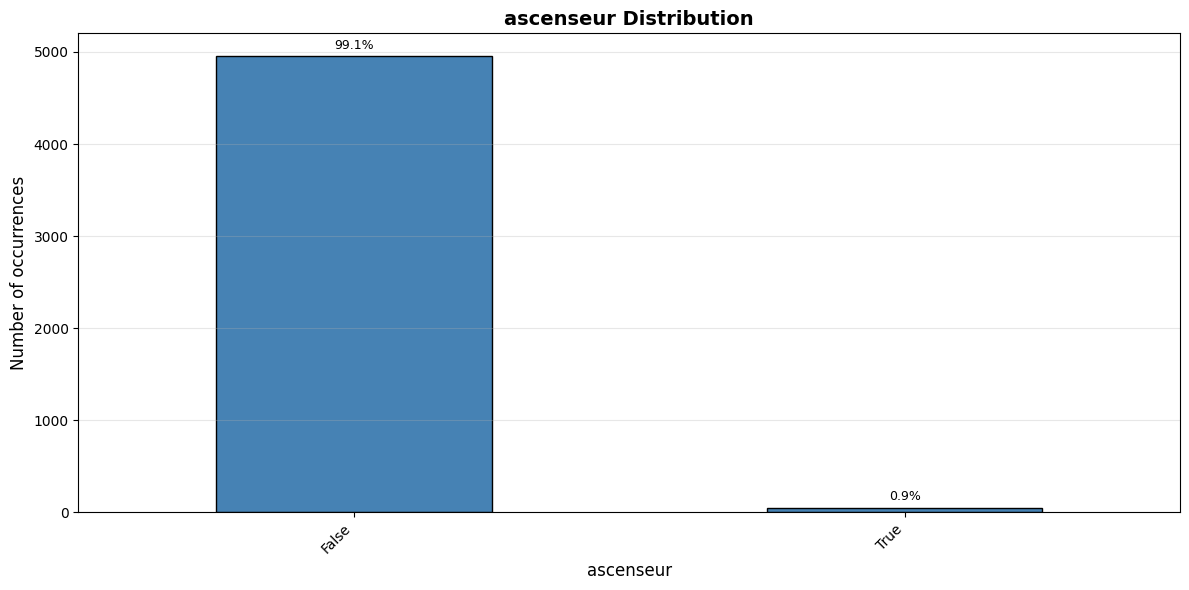


COMMUNE :
                 Value  Count  Pourcentage
          Villeurbanne    247     4.942966
          Saint-Priest    214     4.282570
            Vénissieux    197     3.942365
Lyon 9e Arrondissement    194     3.882329
Lyon 3e Arrondissement    167     3.342005
Lyon 8e Arrondissement    157     3.141885
Lyon 7e Arrondissement    155     3.101861
        Vaulx-en-Velin    154     3.081849
                  Bron    153     3.061837
      Caluire-et-Cuire    152     3.041825
Lyon 5e Arrondissement    144     2.881729
     Saint-Genis-Laval    137     2.741645
               Meyzieu    129     2.581549
Lyon 2e Arrondissement    118     2.361417
      Décines-Charpieu    118     2.361417

DESSERTE :
  Value  Count  Pourcentage
   93:R     26     0.264228
   93:A     24     0.243902
   T2:A     22     0.223577
   T2:R     22     0.223577
  C25:A     22     0.223577
   T4:A     21     0.213415
  C25:R     21     0.213415
   T4:R     21     0.213415
JD466:R     21     0.213415
   80:A  

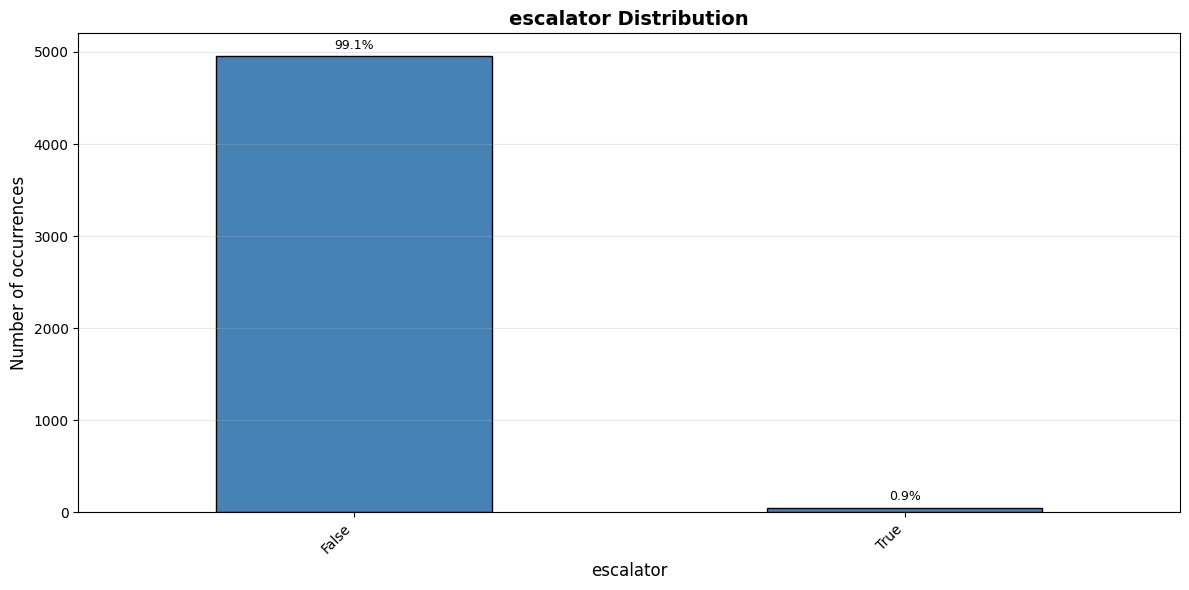


INSEE :
Value  Count  Pourcentage
69266    247     4.942966
69290    214     4.282570
69259    197     3.942365
69389    194     3.882329
69383    167     3.342005
69388    157     3.141885
69387    155     3.101861
69256    154     3.081849
69029    153     3.061837
69034    152     3.041825
69385    144     2.881729
69204    137     2.741645
69282    129     2.581549
69382    118     2.361417
69275    118     2.361417

LAST_UPDATE :
                     Value  Count  Pourcentage
2025-10-28 05:04:22.721166      1     0.010163
2025-10-28 05:04:22.720210      1     0.010163
2025-10-28 05:04:22.715125      1     0.010163
2025-10-28 05:04:22.712554      1     0.010163
2025-10-28 05:04:22.712349      1     0.010163
2025-10-28 05:04:22.712275      1     0.010163
2025-10-28 05:04:22.705086      1     0.010163
2025-10-28 05:04:22.614257      1     0.010163
2025-10-28 05:04:22.614180      1     0.010163
2025-10-28 05:04:22.614112      1     0.010163
2025-10-28 05:04:22.613828      1     0.010

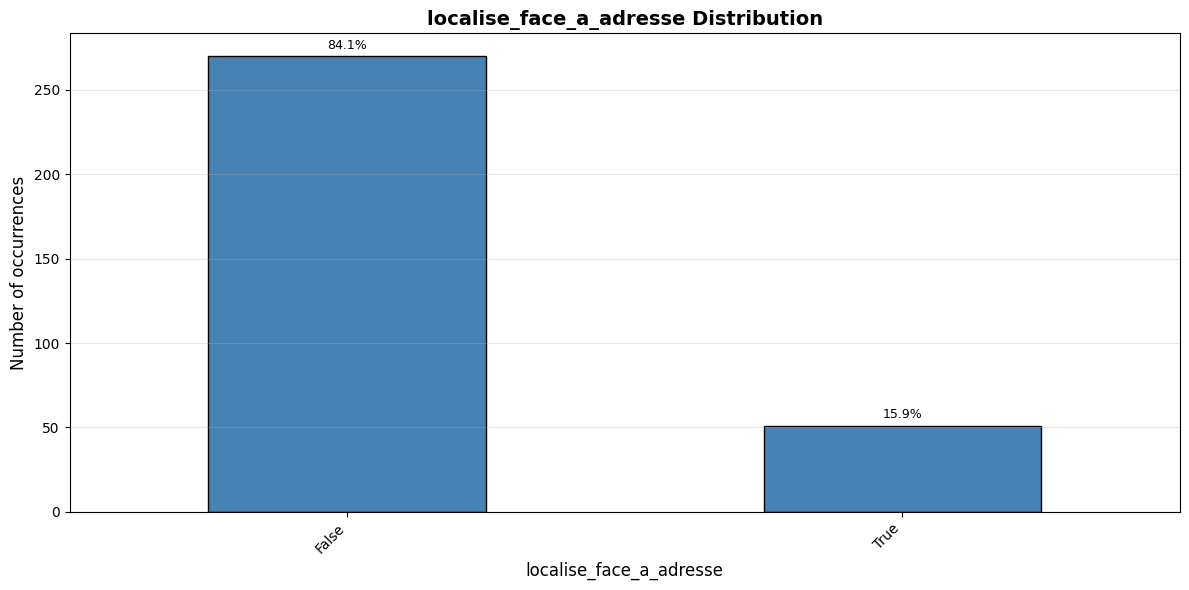


NOM :
                   Value  Count  Pourcentage
  Gare Part-Dieu V.Merle     21     0.213415
  Vaulx-en-Velin La Soie     20     0.203252
           Gorge de Loup     19     0.193089
          Grange Blanche     18     0.182927
                Perrache     18     0.182927
 Gare de Vaise-G.Collomb     18     0.182927
      Gare de Vénissieux     18     0.182927
        Laurent Bonnevay     16     0.162602
          Gare d'Oullins     14     0.142276
          Mermoz - Pinel     13     0.132114
                 Parilly     12     0.121951
 St-Genis-Laval Hôp. Sud     12     0.121951
Charpennes Charles Hernu     12     0.121951
              Cordeliers     12     0.121951
        St Genis Gadagne     11     0.111789

PMR :
Value  Count  Pourcentage
 True   4335    58.731879
False   3046    41.268121


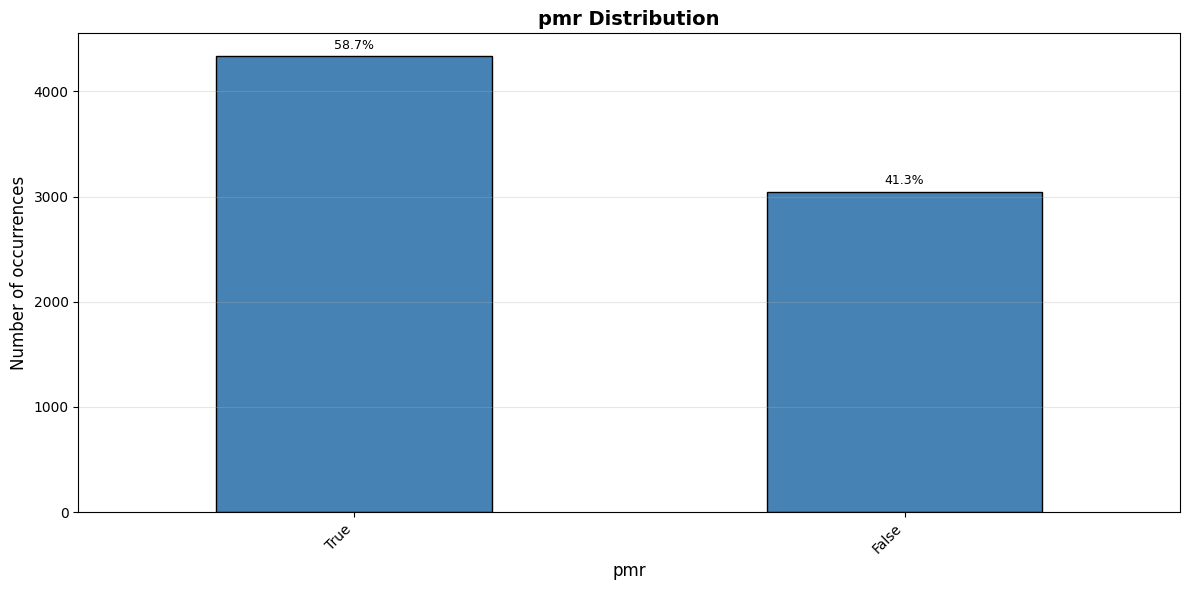


ZONE :
       Value  Count  Pourcentage
           1   4708    47.845528
           2   1656    16.829268
           4   1484    15.081301
           3    979     9.949187
           5    896     9.105691
Zone Externe    117     1.189024


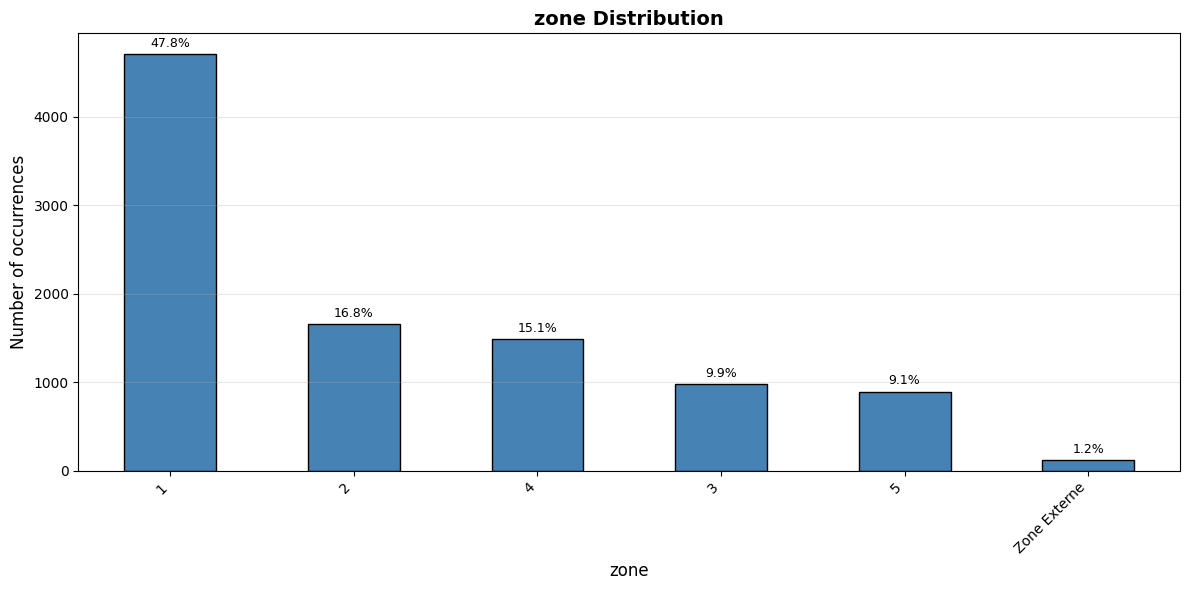

In [9]:
def analyze_categorical_distributions(df, save_path=None):
    """
    Categorical values distribution analysis
    """

    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

    for col in categorical_cols:
        print(f"\n{col.upper()} :")
        value_counts = df[col].value_counts()
        value_pcts = df[col].value_counts(normalize=True) * 100

        distribution = pd.DataFrame({
            'Value': value_counts.index,
            'Count': value_counts.values,
            'Pourcentage': value_pcts.values
        })

        print(distribution.head(15).to_string(index=False))

        # Visualisation
        if df[col].nunique() <= 20:
            fig, ax = plt.subplots(figsize=(12, 6))

            value_counts.head(15).plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
            ax.set_title(f'{col} Distribution', fontsize=14, fontweight='bold')
            ax.set_xlabel(col, fontsize=12)
            ax.set_ylabel('Number of occurrences', fontsize=12)
            ax.grid(axis='y', alpha=0.3)

            # Percentage
            for i, v in enumerate(value_counts.head(15).values):
                pct = value_pcts.iloc[i]
                ax.text(i, v + max(value_counts.values)*0.01, f'{pct:.1f}%',
                       ha='center', va='bottom', fontsize=9)

            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            if save_path:
                plt.savefig(f'results/figures/distribution_{col}.png', dpi=150, bbox_inches='tight')
            plt.show()

analyze_categorical_distributions(df_raw)


Communes Count : 92

🏆 Top 10 communes with most stops :
commune
Villeurbanne              247
Saint-Priest              214
Vénissieux                197
Lyon 9e Arrondissement    194
Lyon 3e Arrondissement    167
Lyon 8e Arrondissement    157
Lyon 7e Arrondissement    155
Vaulx-en-Velin            154
Bron                      153
Caluire-et-Cuire          152
Name: count, dtype: int64

Statistiques per commune :
                        nb_stops        lat       lon
commune                                              
Villeurbanne                 247  45.768968  4.888572
Saint-Priest                 214  45.700391  4.943838
Vénissieux                   197  45.704329  4.881120
Lyon 9e Arrondissement       194  45.780828  4.806037
Lyon 3e Arrondissement       167  45.754401  4.865819
Lyon 8e Arrondissement       157  45.734660  4.871199
Lyon 7e Arrondissement       155  45.739107  4.838968
Vaulx-en-Velin               154  45.771627  4.924249
Bron                         153  45.736

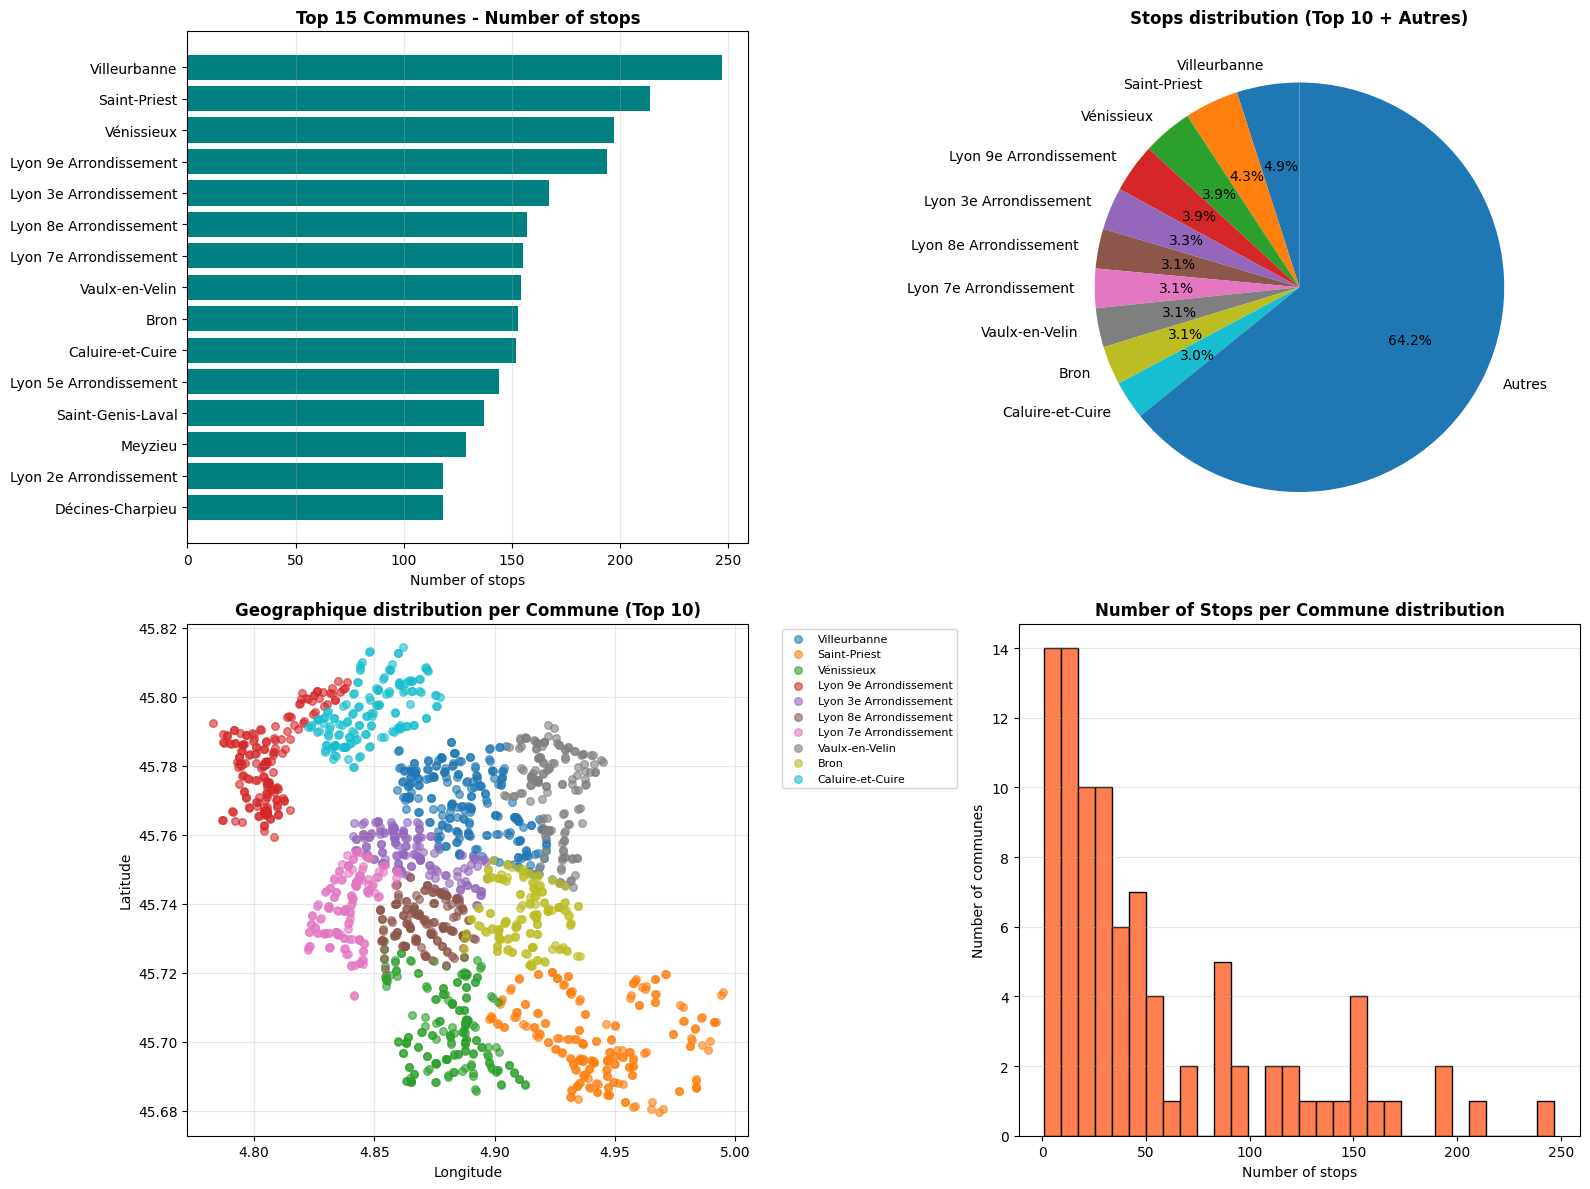

In [11]:
def analyze_communes(df, save_path=None):
    """
    Analyse communes
    """

    # Distribution
    commune_counts = df['commune'].value_counts()

    print(f"\nCommunes Count : {df['commune'].nunique()}")
    print(f"\n🏆 Top 10 communes with most stops :")
    print(commune_counts.head(10))

    # Statistiques
    commune_stats = df.groupby('commune').agg({
        'gid': 'count',
        'lat': 'mean',
        'lon': 'mean'
    }).rename(columns={'gid': 'nb_stops'}).sort_values('nb_stops', ascending=False)

    print(f"\nStatistiques per commune :")
    print(commune_stats.head(10))

    # Visualisation
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Bar plot top communes
    top_communes = commune_counts.head(15)
    axes[0, 0].barh(range(len(top_communes)), top_communes.values, color='teal')
    axes[0, 0].set_yticks(range(len(top_communes)))
    axes[0, 0].set_yticklabels(top_communes.index)
    axes[0, 0].set_xlabel('Number of stops')
    axes[0, 0].set_title('Top 15 Communes - Number of stops', fontweight='bold')
    axes[0, 0].grid(axis='x', alpha=0.3)
    axes[0, 0].invert_yaxis()

    # Pie chart top 10
    top10 = commune_counts.head(10)
    autres = commune_counts.iloc[10:].sum()
    pie_data = pd.concat([top10, pd.Series({'Autres': autres})])

    axes[0, 1].pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
    axes[0, 1].set_title('Stops distribution (Top 10 + Autres)', fontweight='bold')

    # Scatter plot
    communes_uniques = commune_stats.head(10).index
    colors = plt.cm.tab10(np.linspace(0, 1, len(communes_uniques)))

    for i, commune in enumerate(communes_uniques):
        commune_data = df[df['commune'] == commune]
        axes[1, 0].scatter(
            commune_data['lon'],
            commune_data['lat'],
            label=commune,
            alpha=0.6,
            s=30,
            color=colors[i]
        )

    axes[1, 0].set_xlabel('Longitude')
    axes[1, 0].set_ylabel('Latitude')
    axes[1, 0].set_title('Geographique distribution per Commune (Top 10)', fontweight='bold')
    axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    axes[1, 0].grid(True, alpha=0.3)

    # Histogramme distribution
    axes[1, 1].hist(commune_counts.values, bins=30, color='coral', edgecolor='black')
    axes[1, 1].set_xlabel('Number of stops')
    axes[1, 1].set_ylabel('Number of communes')
    axes[1, 1].set_title('Number of Stops per Commune distribution', fontweight='bold')
    axes[1, 1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()

analyze_communes(df_raw)


Lines total count : 1533

Top 20 line:
C25:A      56
PL3:A      55
C25:R      55
72:R       53
52:A       49
C17:A      47
62:A       46
76:R       45
220:A      45
80:R       45
80:A       45
62:R       45
C17:R      45
JD137:R    45
17:R       45
220:R      45
52:R       45
60:A       44
76:A       44
12:A       44
Name: count, dtype: int64

Types of transport distribution:
Bus           21048
Bus Chrono     1793
Tramway         346
Autre           114
Name: count, dtype: int64


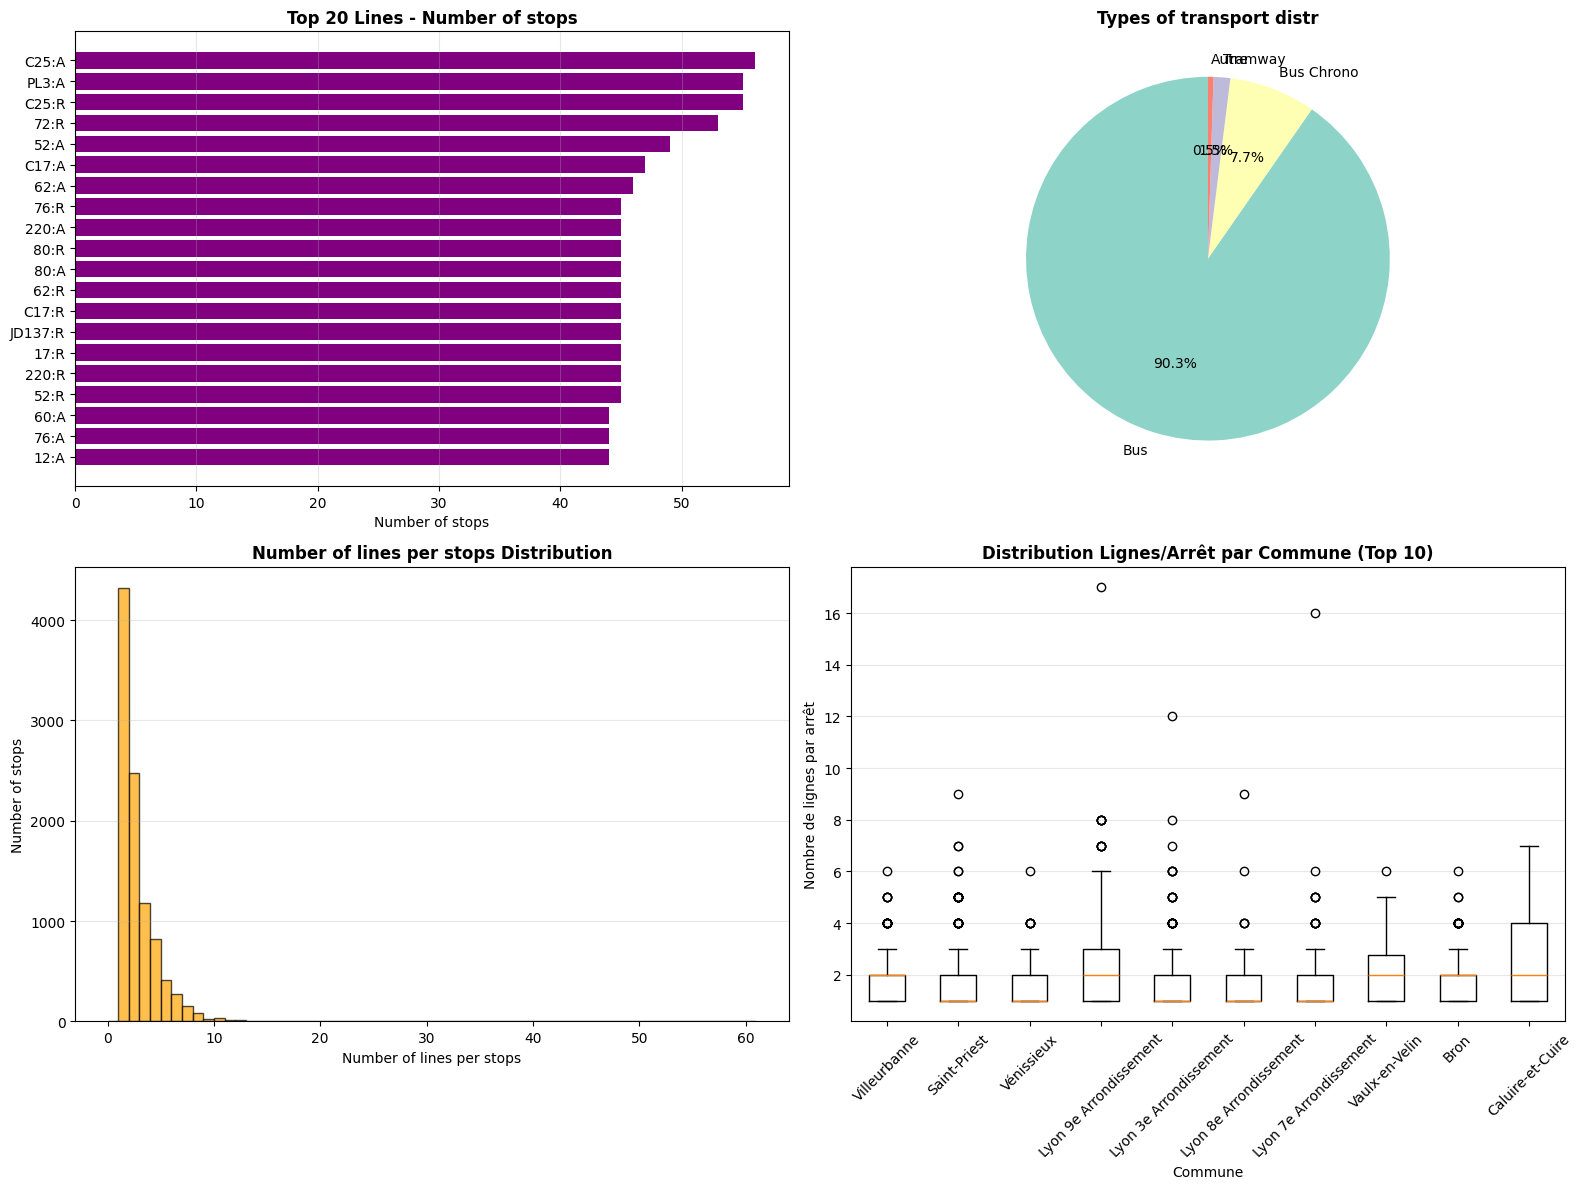

In [14]:
def analyze_lines(df, save_path=None):
    """
    Transport lines analyze
    """

    # Parse all lines
    all_lines = []
    for idx, row in df.iterrows():
        if pd.notna(row['desserte']):
            lines = str(row['desserte']).split(',')
            lines = [line.strip() for line in lines if line.strip()]
            all_lines.extend(lines)

    lines_series = pd.Series(all_lines)
    line_counts = lines_series.value_counts()

    print(f"\nLines total count : {len(line_counts)}")
    print(f"\nTop 20 line:")
    print(line_counts.head(20))

    # Classifier par type
    def classify_line(line):
        line = str(line).upper()
        if line.startswith('M'): # Not in data
            return 'Métro'
        elif line.startswith('T'):
            return 'Tramway'
        elif line.startswith('C'): # To extend more based on the official website https://www.tcl.fr/lignes
            return 'Bus Chrono'
        elif any(char.isdigit() for char in line):
            return 'Bus'
        else:
            return 'Autre'

    line_types = lines_series.apply(classify_line)
    type_counts = line_types.value_counts()

    print(f"\nTypes of transport distribution:")
    print(type_counts)

    # Visualisation
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Top lines
    top_lines = line_counts.head(20)
    axes[0, 0].barh(range(len(top_lines)), top_lines.values, color='purple')
    axes[0, 0].set_yticks(range(len(top_lines)))
    axes[0, 0].set_yticklabels(top_lines.index)
    axes[0, 0].set_xlabel('Number of stops')
    axes[0, 0].set_title('Top 20 Lines - Number of stops', fontweight='bold')
    axes[0, 0].grid(axis='x', alpha=0.3)
    axes[0, 0].invert_yaxis()

    # Pie chart per type
    axes[0, 1].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%',
                   startangle=90, colors=plt.cm.Set3.colors)
    axes[0, 1].set_title('Types of transport distr', fontweight='bold')

    # Distribution number of lines per stops
    df['nb_lines'] = df['desserte'].apply(
        lambda x: len(str(x).split(',')) if pd.notna(x) else 0
    )

    axes[1, 0].hist(df['nb_lines'], bins=range(0, df['nb_lines'].max()+2),
                    color='orange', edgecolor='black', alpha=0.7)
    axes[1, 0].set_xlabel('Number of lines per stops')
    axes[1, 0].set_ylabel('Number of stops')
    axes[1, 0].set_title('Number of lines per stops Distribution', fontweight='bold')
    axes[1, 0].grid(axis='y', alpha=0.3)

    # Boxplot number of lines per comune (top comunes)
    top_communes = df['commune'].value_counts().head(10).index
    data_for_box = [df[df['commune'] == c]['nb_lines'].values for c in top_communes]

    axes[1, 1].boxplot(data_for_box, labels=top_communes)
    axes[1, 1].set_xlabel('Commune')
    axes[1, 1].set_ylabel('Nombre de lignes par arrêt')
    axes[1, 1].set_title('Distribution Lignes/Arrêt par Commune (Top 10)', fontweight='bold')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()

    return line_counts, type_counts

line_stats, type_stats = analyze_lines(df_raw)